# The 10-armed Testbed
To roughly assess the relative effectiveness of the greedy and $\varepsilon$-greedy action-value
methods, we compared them numerically on a suite of test problems. This was a set
of 2000 randomly generated k-armed bandit problems with $k$ = 10. For each bandit
problem, such as the one shown in Figure 2.1, the action values, $q_*(a)$, a = 1, . . . , 10,
were selected according to a normal (Gaussian) distribution with mean 0 and variance 1.
Then, when a learning method applied to that problem selected action At at time step t,
the actual reward, $R_t$, was selected from a normal distribution with mean $q_*(A_t)$ and
variance 1.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import functions as fn
random.seed(999)
%load_ext autoreload
%autoreload 2

[-0.27423284  0.30415469 -0.63560554 -0.92362541  0.34259927 -2.67529058
  1.20849569  1.79886513  0.64927285 -1.39773657]


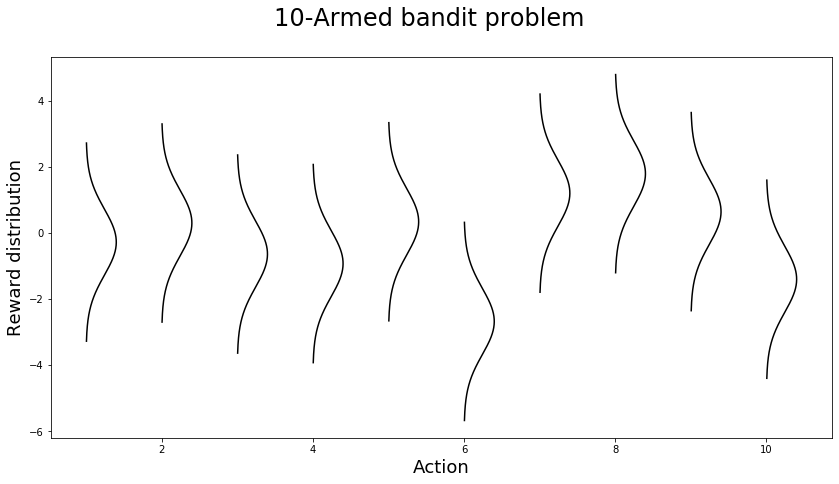

In [65]:
k = 10
#action_values = np.random.normal(size=k)
sd=1
support = [np.linspace(action_values[i]-3*sd,action_values[i]+3*sd,1000) for i in range(k)]
fig, ax = plt.subplots()
fig.suptitle('10-Armed bandit problem', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Action', fontsize=18)
plt.ylabel('Reward distribution', fontsize=18)

for each in np.linspace(1, k, k):
    fn.draw_gaussian_at(support[int(each)-1], sd=1, height=0.5, xpos=(int(each)), ypos=support[int(each)-1].mean(), ax=ax, color='k')
print(action_values)

plt.savefig('reward_dist.png')

## Epsilon-greedy action selector method

In [3]:
def greedy(iv, t, action_values, qt = 1, epsilon=0.0):
    """
    Função que replica o método greedy
    """
    if iv.shape != action_values.shape:
        raise ValueError('iv and action_values must have the same shape')
    ret_total = pd.DataFrame()
    opt_act_tot = pd.DataFrame()
    for i in range(qt):
        est_action_value = list(iv.copy().astype(float))
        qt_chosen = list(np.zeros_like(est_action_value))
        ret = []
        optimal_action = []
        for n in range(1, t+1):
            if np.random.uniform(0,1,1) >= epsilon:
                maximum = max(est_action_value)
                qtd_max = np.sum(est_action_value==maximum)
                if qtd_max == 1:
                    choice = np.argmax(est_action_value)
                else:
                    maxs = np.array([index for index, value in enumerate(est_action_value) if value == maximum])
                    choice = np.random.choice(maxs)
            else:
                choice = np.random.choice(range(len(est_action_value)))

            qt_chosen[choice] +=1 
            r_t = float(np.random.normal(loc=action_values[choice],scale=1.0,size=1))
            ret.append(r_t)
            update = est_action_value[choice] + (1/qt_chosen[choice]) * (r_t - est_action_value[choice])
            est_action_value[choice] = update

            if choice == np.argmax(action_values):
                optimal_action.append(1)
            else:
                optimal_action.append(0)
    
        ret_total = pd.concat([ret_total, pd.DataFrame(ret, columns = [i+1], index=range(1,t+1))], axis=1, sort=False, )
        opt_act_tot = pd.concat([opt_act_tot, pd.DataFrame(optimal_action, columns=[i+1], index=range(1,t+1))], axis=1, sort=False)
    return ret_total, opt_act_tot

In [4]:
# Strictly greedy
returns_sg, optimal_action_sg = greedy(np.repeat(0,10),1000, action_values, qt=2000, epsilon=0)

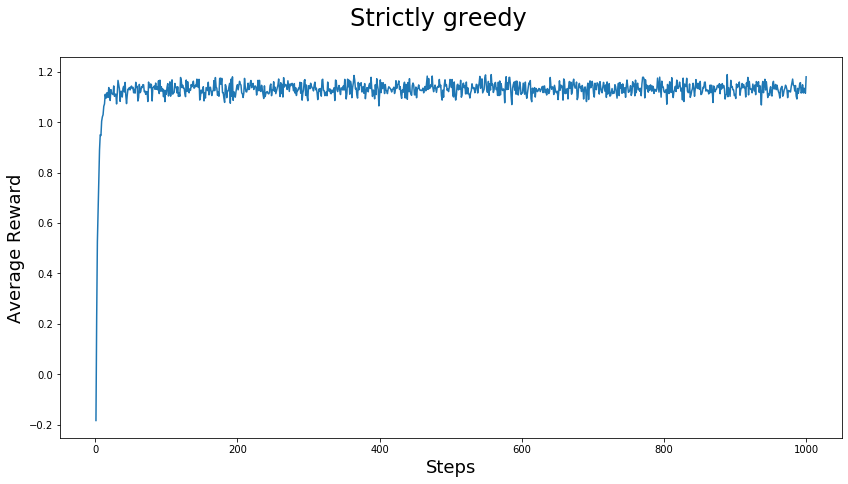

In [67]:
#returns_sg.mean(axis=1).plot(figsize=(12,8), title = "Strictly greedy")
fig = plt.figure()
plt.plot(returns_sg.mean(axis=1))
fig.suptitle('Strictly greedy', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.savefig('AR_SG.png')
plt.show(fig)

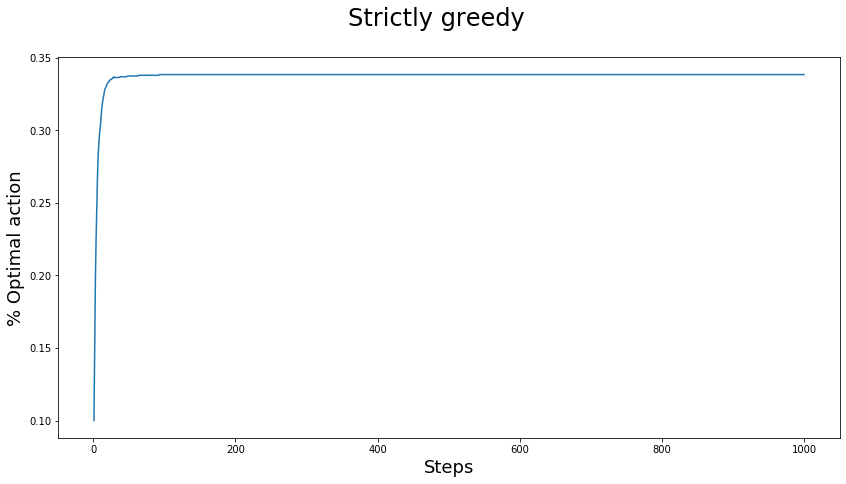

In [68]:
#optimal_action_sg.mean(axis=1).plot(figsize=(12,8), title="Strictly greedy")
fig = plt.figure()
plt.plot(optimal_action_sg.mean(axis=1))
fig.suptitle('Strictly greedy', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)
plt.savefig('OA_SG.png')
plt.show(fig)

In [7]:
#Epsilon = 0.03
returns_e03, optimal_action_e03 = greedy(np.repeat(0,10),1000, action_values, qt=2000, epsilon=0.03)

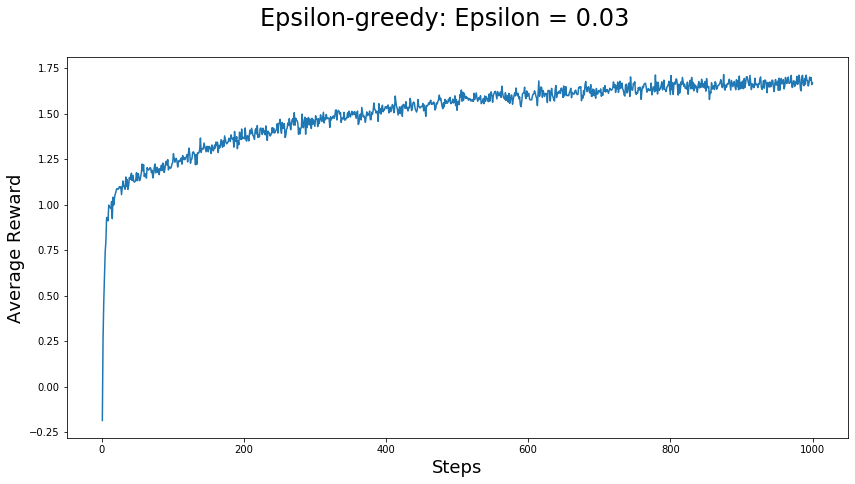

In [69]:
#returns_e03.mean(axis=1).plot(figsize=(12,8), title = "Epsilon-greedy: Epsilon = 0.03")
fig = plt.figure()
plt.plot(returns_e03.mean(axis=1))
fig.suptitle('Epsilon-greedy: Epsilon = 0.03', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.savefig('AR_EG03.png')
plt.show(fig)

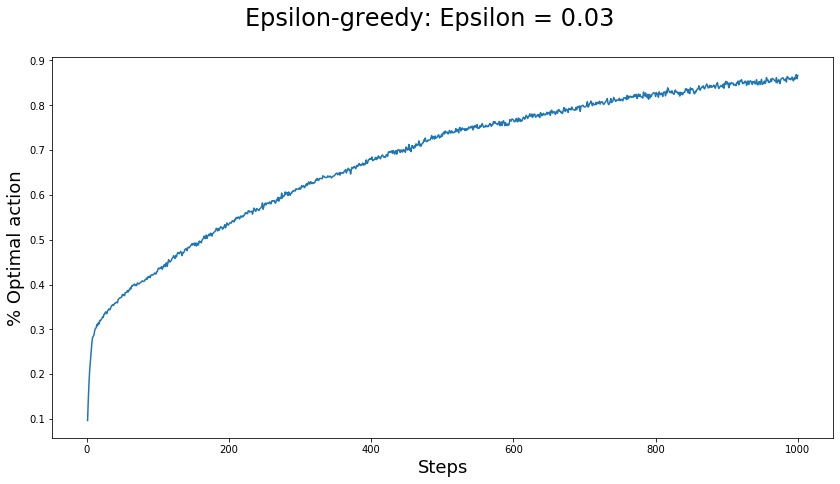

In [70]:
#optimal_action_e03.mean(axis=1).plot(figsize=(12,8), title="Epsilon-greedy: Epsilon = 0.03")
fig = plt.figure()
plt.plot(optimal_action_e03.mean(axis=1))
fig.suptitle('Epsilon-greedy: Epsilon = 0.03', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)
plt.savefig('OA_EG03.png')
plt.show(fig)

In [10]:
#Epsilon = 0.1
returns_e10, optimal_action_e10 = greedy(np.repeat(0,10),1000, action_values, qt=2000, epsilon=0.1)

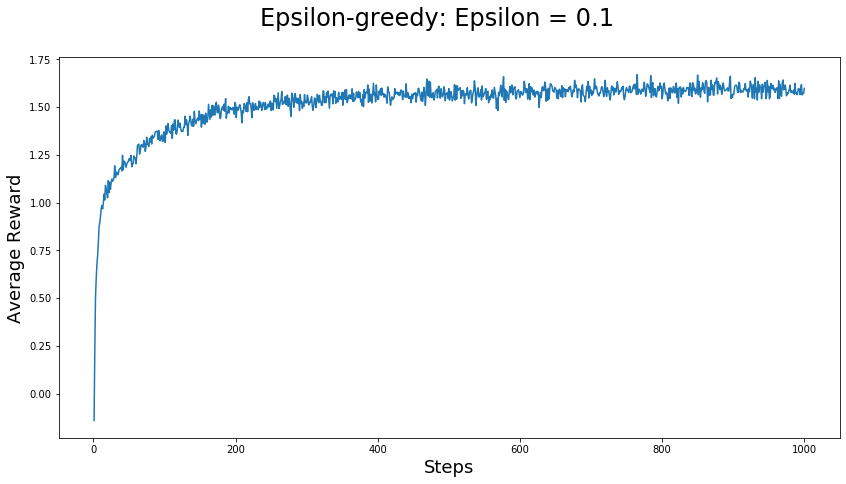

In [71]:
#returns_e10.mean(axis=1).plot(figsize=(12,8), title="Epsilon-greedy: Epsilon = 0.1")
fig = plt.figure()
plt.plot(returns_e10.mean(axis=1))
fig.suptitle('Epsilon-greedy: Epsilon = 0.1', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.savefig('AR_EG10.png')
plt.show(fig)

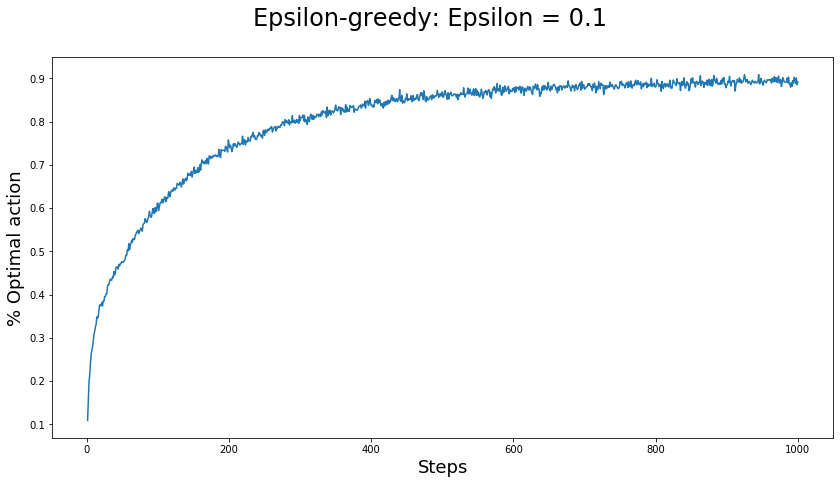

In [72]:
#optimal_action_e10.mean(axis=1).plot(figsize=(12,8), title="Epsilon-greedy: Epsilon = 0.1")
fig = plt.figure()
plt.plot(optimal_action_e10.mean(axis=1))
fig.suptitle('Epsilon-greedy: Epsilon = 0.1', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)
plt.savefig('OA_EG10.png')
plt.show(fig)

## Optimistic Initial Values

All the methods we have discussed so far are dependent to some extent on the initial
action-value estimates, $Q_1(a)$. In the language of statistics, these methods are <i>biased</i>
by their initial estimates. For the sample-average methods, the bias disappears once all
actions have been selected at least once, but for methods with constant $\alpha$, the bias is
permanent, though decreasing over time as given by (2.6). In practice, this kind of bias
is usually not a problem and can sometimes be very helpful. The downside is that the
initial estimates become, in effect, a set of parameters that must be picked by the user, if
only to set them all to zero. The upside is that they provide an easy way to supply some
prior knowledge about what level of rewards can be expected.

Initial action values can also be used as a simple way to encourage exploration. Suppose
that instead of setting the initial action values to zero, as we did in the 10-armed testbed,
we set them all to +5. Recall that the $q_*(a)$ in this problem are selected from a normal
distribution with mean 0 and variance 1. An initial estimate of +5 is thus wildly optimistic.
But this optimism encourages action-value methods to explore. Whichever actions are
initially selected, the reward is less than the starting estimates; the learner switches to
other actions, being “disappointed” with the rewards it is receiving. The result is that all
actions are tried several times before the value estimates converge. The system does a
fair amount of exploration even if greedy actions are selected all the time.

In [13]:
#Epsilon = 0.1 e initial values = 5
returns_oiv, optimal_action_oiv = greedy(np.repeat(5,10),1000, action_values, qt=2000, epsilon=0.1)

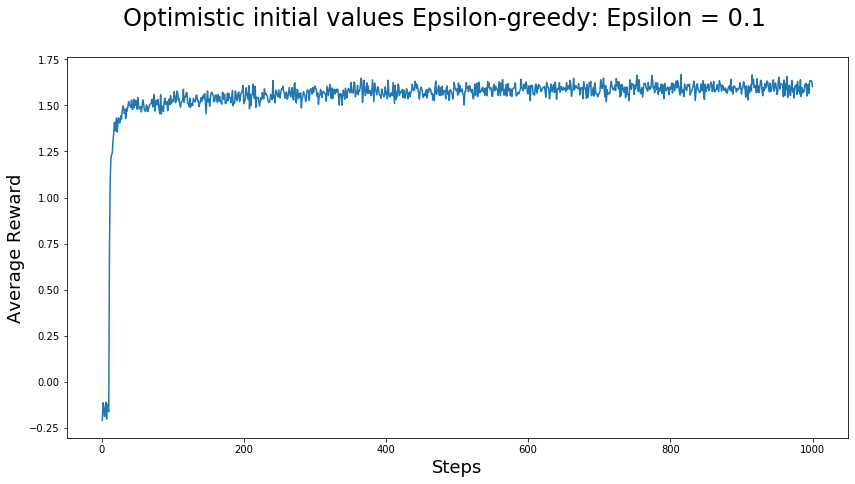

In [73]:
#returns_oiv.mean(axis=1).plot(figsize=(12,8), title="Optimistic initial values and Epsilon-greedy: Epsilon = 0.1")
fig = plt.figure()
plt.plot(returns_oiv.mean(axis=1))
fig.suptitle('Optimistic initial values Epsilon-greedy: Epsilon = 0.1', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.savefig('AR_OIV.png')
plt.show(fig)

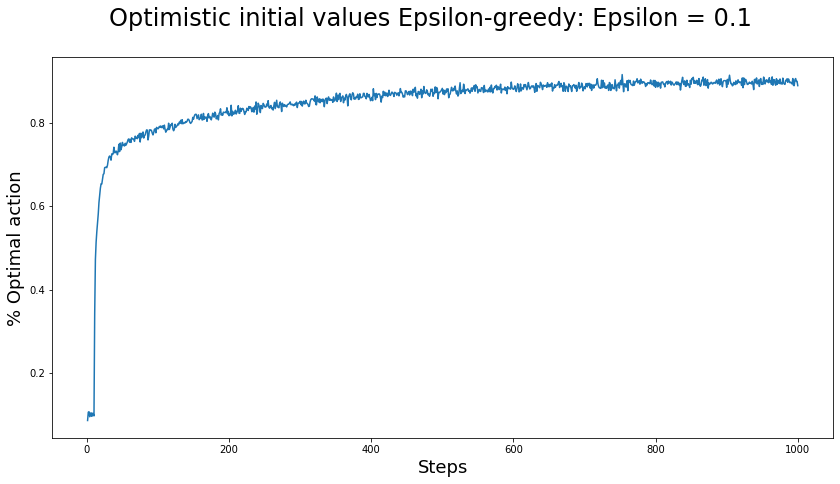

In [74]:
#optimal_action_oiv.mean(axis=1).plot(figsize=(12,8), title="Optimistic initial values Epsilon-greedy: Epsilon = 0.1")

fig = plt.figure()
plt.plot(optimal_action_oiv.mean(axis=1))
fig.suptitle('Optimistic initial values Epsilon-greedy: Epsilon = 0.1', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)
plt.savefig('OA_OIV.png')
plt.show(fig)

## Tracking a Nonstationary Problem

The averaging methods discussed so far are appropriate for stationary bandit problems,
that is, for bandit problems in which the reward probabilities do not change over time.
As noted earlier, we often encounter reinforcement learning problems that are e↵ectively
nonstationary. In such cases it makes sense to give more weight to recent rewards than
to long-past rewards. One of the most popular ways of doing this is to use a constant
step-size parameter. For example, the incremental update rule for updating an
average $Q_n$ of the $n − 1$ past rewards is modified to be:

$$ Q_{n+1} = Q_n + \alpha[R_n - Q_n] ,$$

where the step-size parameter $\alpha \in (0, 1]$   is constant. This results in $Q_{n+1}$ being a weighted
average of past rewards and the initial estimate $Q_1$:

$$ Q_{n+1} = (1-\alpha)^n Q_1 + \sum_{i=1}^{n} \alpha(1-\alpha)^{n-i}R_i$$

We call this a weighted average because the sum of the weights is $(1 − \alpha)^n + \sum_{i=1}^{n}\alpha(1-\alpha)^{n-i} = 1$, as you can check for yourself. Note that the weight, $\alpha(1-\alpha)^{n-i}$, given to the
reward $R_i$ depends on how many rewards ago, $n−i$, it was observed. The quantity $1−\alpha$
is less than 1, and thus the weight given to $R_i$ decreases as the number of intervening
rewards increases. In fact, the weight decays exponentially according to the exponent
on $(1 − \alpha)$. (If $1− \alpha$ = 0, then all the weight goes on the very last reward, $R_n$, because
of the convention that $0^0 = 1$.) Accordingly, this is sometimes called an exponential
<i>recency-weighted average</i>.

In [16]:
def greedy_nonstationary(iv, t, action_values, k=10, qt = 1, epsilon=0.0, alpha = None, stationary = True, **kwargs):
    """
    Function that replicates the epsilon-greedy method with option to modify for weighted average estimator (nonstationary)
    """
    if iv.shape != action_values.shape:
        raise ValueError('iv and action_values must have the same shape')
    ret_total = pd.DataFrame()
    opt_act_tot = pd.DataFrame()
    for i in range(qt):
        est_action_value = list(iv.copy().astype(float))
        initial_value = list(iv.copy().astype(float))
        qt_chosen = list(np.zeros_like(est_action_value).astype(int))
        ret = []
        optimal_action = []
        ret_by_action = [[] for _ in range(k)]
        av = action_values.copy()
        for n in range(1, t+1):
            # Epsilon-greedy function
            if np.random.uniform(0,1,1) >= epsilon:
                maximum = max(est_action_value)
                qtd_max = np.sum(est_action_value==maximum)
                if qtd_max == 1:
                    choice = np.argmax(est_action_value)
                else:
                    maxs = np.array([index for index, value in enumerate(est_action_value) if value == maximum])
                    choice = np.random.choice(maxs)
            else:
                choice = np.random.choice(range(len(est_action_value)))

            qt_chosen[choice] +=1 
            r_t = float(np.random.normal(loc=av[choice],scale=1.0,size=1))
            ret.append(r_t)
            
            if not stationary:
                ret_by_action[choice].append(r_t)
                # Weighted average for nonstationary problems
                update = fn.wa_nonstationary(alpha, initial_value[choice], ret_by_action[choice], qt_chosen[choice])
            else:
                update = est_action_value[choice] + (1/qt_chosen[choice]) * (r_t - est_action_value[choice])
            
            est_action_value[choice] = update
            
            # If Stationary == True, the function below returns the same action-value, otherwise it adds a normal random variable for each of the actions
            av = fn.stationary_func(av, stationary=stationary, **kwargs)

            if av[choice] == av[np.argmax(av)]:
                optimal_action.append(1)
            else:
                optimal_action.append(0)
    
        ret_total = pd.concat([ret_total, pd.DataFrame(ret, columns = [i+1], index=range(1,t+1))], axis=1, sort=False, )
        opt_act_tot = pd.concat([opt_act_tot, pd.DataFrame(optimal_action, columns=[i+1], index=range(1,t+1))], axis=1, sort=False)
    return ret_total, opt_act_tot

### Testing how the weigthed average rounds the non stationary problem 

In [17]:
#E-greedy nonstationary with nonstationary problem
returns_ns, optimal_action_ns = greedy_nonstationary(np.repeat(0.0,10), 1000, np.repeat(0.0,10), qt=2000, epsilon=0.1, alpha=0.1, stationary=False)

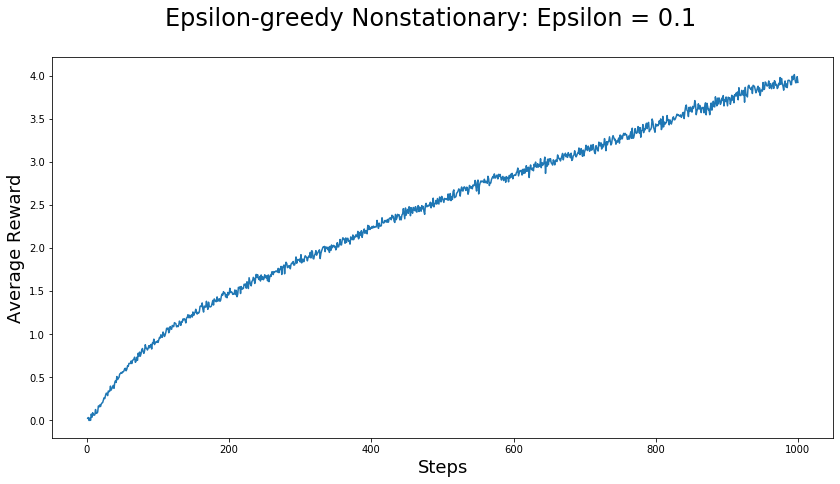

In [75]:
#returns_ns.mean(axis=1).plot(figsize=(12,8), title="Epsilon-greedy Nonstationary: Epsilon = 0.1")
fig = plt.figure()
plt.plot(returns_ns.mean(axis=1))
fig.suptitle('Epsilon-greedy Nonstationary: Epsilon = 0.1', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.savefig('AR_NS.png')
plt.show(fig)

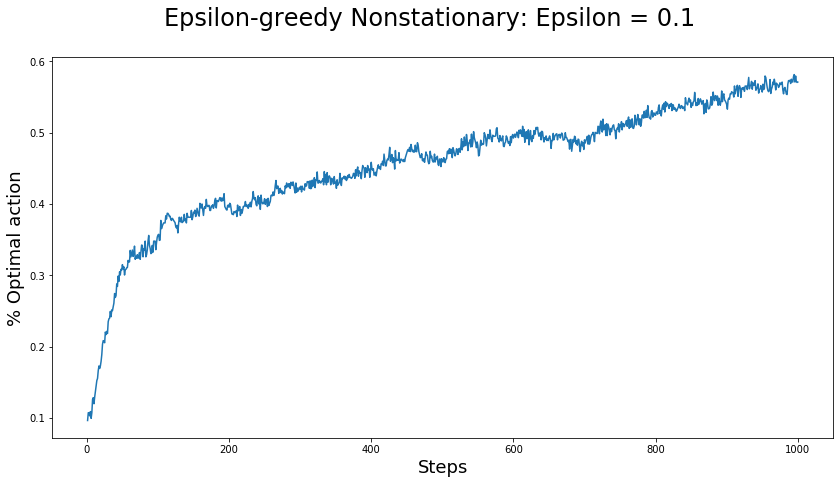

In [76]:
#optimal_action_ns.mean(axis=1).plot(figsize=(12,8), title="Epsilon-greedy Nonstationary: Epsilon = 0.1")
fig = plt.figure()
plt.plot(optimal_action_ns.mean(axis=1))
fig.suptitle('Epsilon-greedy Nonstationary: Epsilon = 0.1', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)
plt.savefig('OA_NS.png')
plt.show(fig)

## Exercise 2.5 (programming)
Design and conduct an experiment to demonstrate the
difficulties that sample-average methods have for nonstationary problems. Use a modified
version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take
independent random walks (say by adding a normally distributed increment with mean
zero and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like
Figure 2.2 for an action-value method using sample averages, incrementally computed,
and another action-value method using a constant step-size parameter, $\alpha$ = 0.1. Use
$\varepsilon$ = 0.1 and longer runs, say of 10,000 steps.

In order to resolve this exercise, we will need a new function that runs both methods at same time.

In [30]:
from functions import greedy_bothmethods as gb
returns_sa, optimal_action_sa, returns_nonstationary, optimal_action_nonstationary = gb(np.repeat(0.0,10), 10000, action_values=np.repeat(0.0,10), k=10, qt = 200, epsilon=0.1, alpha = 0.1, stationary = False)

Amostra 1 de 200
Amostra 2 de 200
Amostra 3 de 200
Amostra 4 de 200
Amostra 5 de 200
Amostra 6 de 200
Amostra 7 de 200
Amostra 8 de 200
Amostra 9 de 200
Amostra 10 de 200
Amostra 11 de 200
Amostra 12 de 200
Amostra 13 de 200
Amostra 14 de 200
Amostra 15 de 200
Amostra 16 de 200
Amostra 17 de 200
Amostra 18 de 200
Amostra 19 de 200
Amostra 20 de 200
Amostra 21 de 200
Amostra 22 de 200
Amostra 23 de 200
Amostra 24 de 200
Amostra 25 de 200
Amostra 26 de 200
Amostra 27 de 200
Amostra 28 de 200
Amostra 29 de 200
Amostra 30 de 200
Amostra 31 de 200
Amostra 32 de 200
Amostra 33 de 200
Amostra 34 de 200
Amostra 35 de 200
Amostra 36 de 200
Amostra 37 de 200
Amostra 38 de 200
Amostra 39 de 200
Amostra 40 de 200
Amostra 41 de 200
Amostra 42 de 200
Amostra 43 de 200
Amostra 44 de 200
Amostra 45 de 200
Amostra 46 de 200
Amostra 47 de 200
Amostra 48 de 200
Amostra 49 de 200
Amostra 50 de 200
Amostra 51 de 200
Amostra 52 de 200
Amostra 53 de 200
Amostra 54 de 200
Amostra 55 de 200
Amostra 56 de 200
A

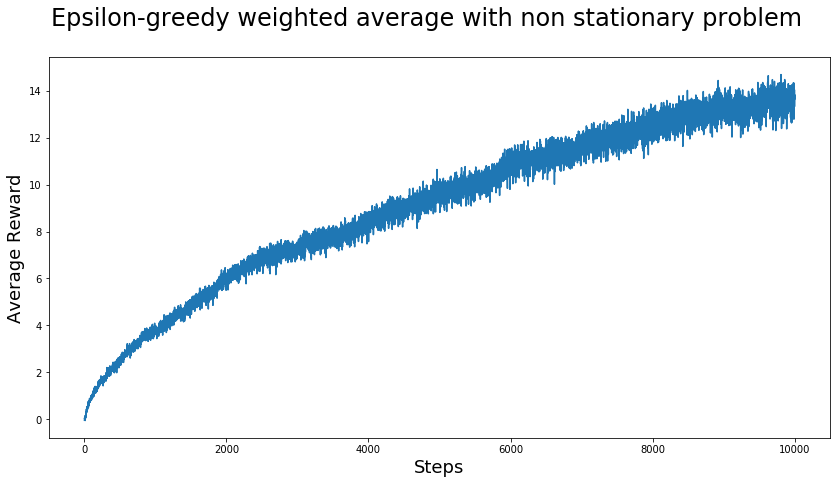

In [77]:
#returns_nonstationary.mean(axis=1).plot(figsize=(12,8), title="Epsilon-greedy sample average with non stationary problem")
fig = plt.figure()
plt.plot(returns_nonstationary.mean(axis=1))
fig.suptitle('Epsilon-greedy weighted average with non stationary problem', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.savefig('AR_NS_10K.png')
plt.show(fig)

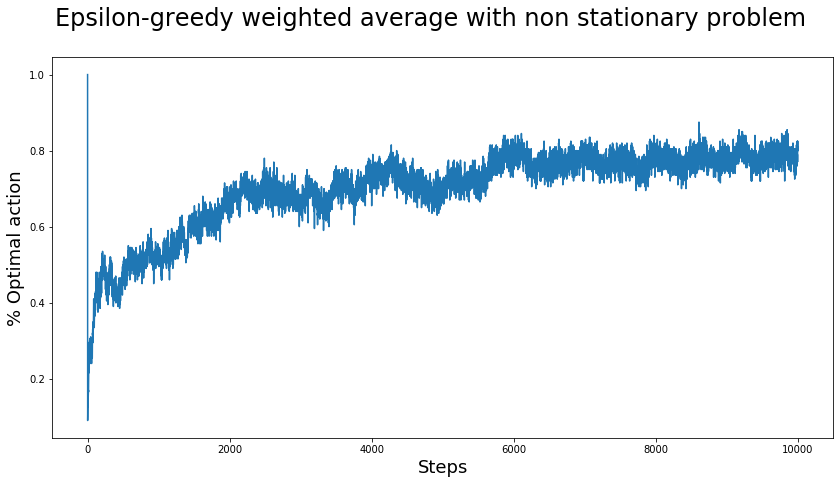

In [78]:
#optimal_action_nonstationary.mean(axis=1).plot(figsize=(12,8), title="Epsilon-greedy sample average with non stationary problem")
fig = plt.figure()
plt.plot(optimal_action_nonstationary.mean(axis=1))
fig.suptitle('Epsilon-greedy weighted average with non stationary problem', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)
plt.savefig('OA_NS_10K.png')
plt.show(fig)

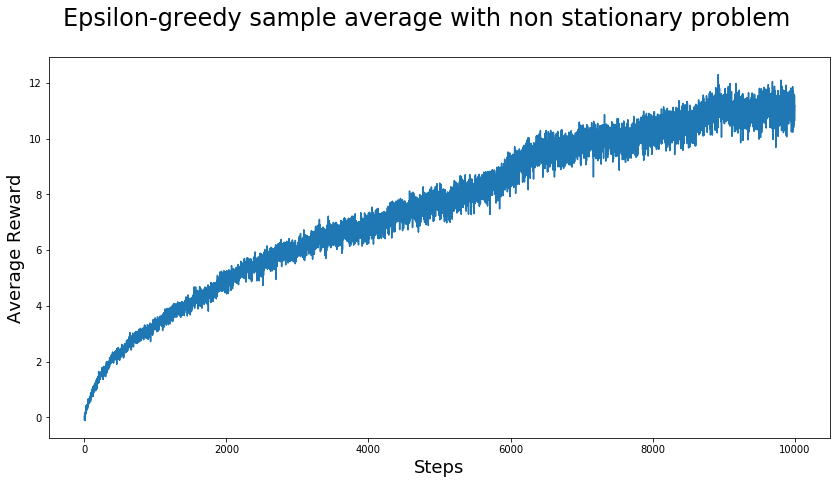

In [79]:
#returns_sa.mean(axis=1).plot(figsize=(12,8), title="Weighted average with non stationary problem")
fig = plt.figure()
plt.plot(returns_sa.mean(axis=1))
fig.suptitle('Epsilon-greedy sample average with non stationary problem', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.savefig('AR_SA_10K.png')
plt.show(fig)

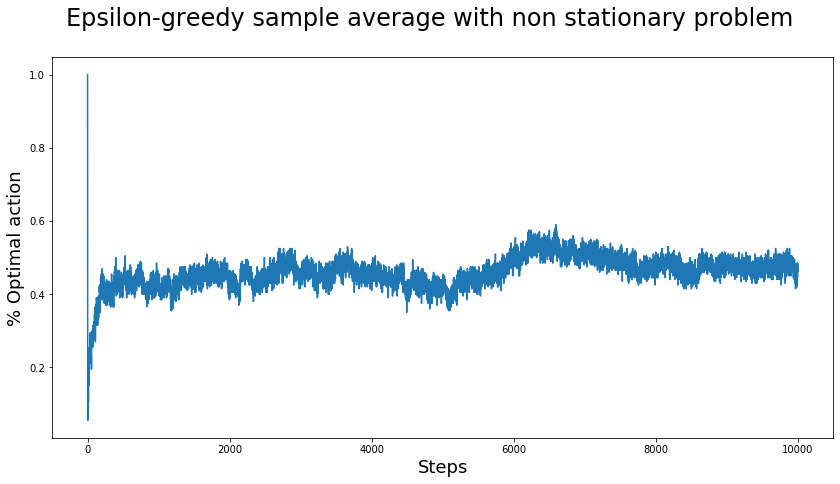

In [80]:
#optimal_action_sa.mean(axis=1).plot(figsize=(12,8), title="Weighted average with non stationary problem")
fig = plt.figure()
plt.plot(optimal_action_sa.mean(axis=1))
fig.suptitle('Epsilon-greedy sample average with non stationary problem', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)
plt.savefig('OA_SA_10K.png')
plt.show(fig)

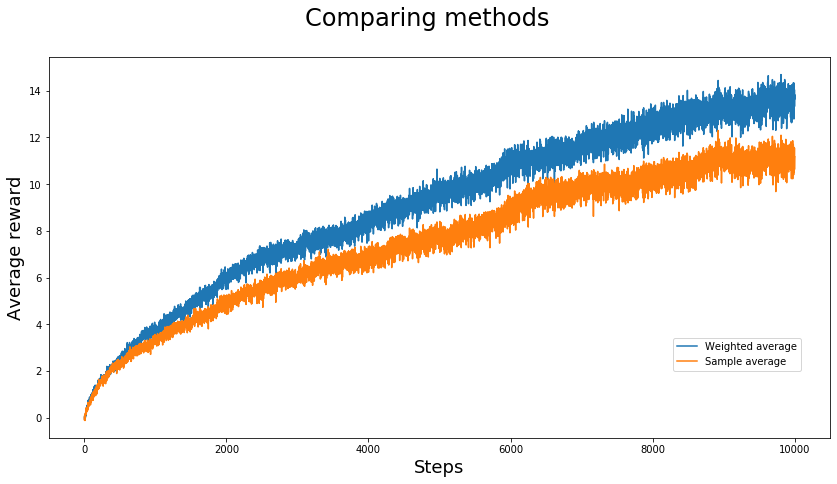

In [81]:
fig = plt.figure()
plt.plot(returns_nonstationary.mean(axis=1), label='Weighted average')
plt.plot(returns_sa.mean(axis=1), label='Sample average')
fig.suptitle('Comparing methods', fontsize=24)
fig.set_size_inches(14,7)
fig.legend(bbox_to_anchor=(0.80,0.3))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average reward', fontsize=18)
plt.savefig('AR_CM_10K.png')
plt.show(fig)

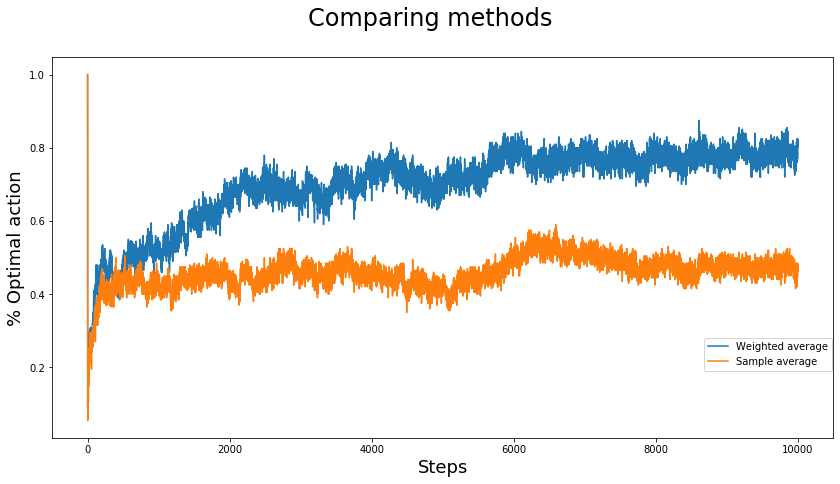

In [82]:
fig = plt.figure()
plt.plot(optimal_action_nonstationary.mean(axis=1), label='Weighted average')
plt.plot(optimal_action_sa.mean(axis=1), label='Sample average')
fig.suptitle('Comparing methods', fontsize=24)
fig.set_size_inches(14,7)
fig.legend(bbox_to_anchor=(0.83,0.3))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)
plt.savefig('OA_CM_10K.png')
plt.show(fig)

## Upper-Confidence-Bound Action Selection

Exploration is needed because there is always uncertainty about the accuracy of the
action-value estimates. The greedy actions are those that look best at present, but some of
the other actions may actually be better. $\varepsilon$-greedy action selection forces the non-greedy
actions to be tried, but indiscriminately, with no preference for those that are nearly
greedy or particularly uncertain. It would be better to select among the non-greedy
actions according to their potential for actually being optimal, taking into account both
how close their estimates are to being maximal and the uncertainties in those estimates.
One effective way of doing this is to select actions according to:

$$ A_t = \underset{a}{\operatorname{argmax}} Q_t(a) + c\sqrt{\dfrac{\ln t}{N_t(a)}}$$

where $\ln t$ denotes the natural logarithm of $t$ (the number that $e \approx 2.71828$ would have
to be raised to in order to equal $t$), $N_t(a)$ denotes the number of times that action $a$ has
been selected prior to time $t$), and the number $c > 0$ controls
the degree of exploration. If $N_t(a) = 0$, then $a$ is considered to be a maximizing action.

In [20]:
def ucb(iv, t, action_values, qt = 1, epsilon=0.0, c=2, **kwargs):
    """
    Function that choose the action accordingly to the upper-confindence-bound action selection method
    """
    if iv.shape != action_values.shape:
        raise ValueError('iv and action_values must have the same shape')
    ret_total = pd.DataFrame()
    opt_act_tot = pd.DataFrame()
    for i in range(qt):
        est_action_value = list(iv.copy().astype(float))
        qt_chosen = list(np.zeros_like(est_action_value))
        ret = []
        optimal_action = []
        for n in range(1, t+1):
            if np.random.uniform(0,1,1) >= epsilon:
                maximum = max(est_action_value)
                qtd_max = np.sum(est_action_value==maximum)
                if qtd_max == 1:
                    choice = np.argmax(est_action_value)
                else:
                    maxs = np.array([index for index, value in enumerate(est_action_value) if value == maximum])
                    choice = np.random.choice(maxs)
            else:
                # The method only chooses the action accordingly to the ucb, when the agent chooses to explore
                if not all(qt_chosen):
                    zeros = np.array([index for index, value in enumerate(est_action_value) if value == 0])
                    choice = np.random.choice(zeros)
                else:
                    ucb = est_action_value + c * (np.log(n)/qt_chosen)**(1/2)
                    maxs = np.array([index for index, value in enumerate(ucb) if value == max(ucb)])
                    choice = np.random.choice(maxs)

            qt_chosen[choice] +=1 
            r_t = float(np.random.normal(loc=action_values[choice],scale=1.0,size=1))
            ret.append(r_t)
            update = est_action_value[choice] + (1/qt_chosen[choice]) * (r_t - est_action_value[choice])
            est_action_value[choice] = update

            if choice == np.argmax(action_values):
                optimal_action.append(1)
            else:
                optimal_action.append(0)
    
        ret_total = pd.concat([ret_total, pd.DataFrame(ret, columns = [i+1], index=range(1,t+1))], axis=1, sort=False, )
        opt_act_tot = pd.concat([opt_act_tot, pd.DataFrame(optimal_action, columns=[i+1], index=range(1,t+1))], axis=1, sort=False)
    return ret_total, opt_act_tot

In [21]:
#E-greedy with ucb method
returns_ucb, optimal_action_ucb = ucb(np.repeat(0,10),1000, action_values, qt=2000, epsilon=0.1, alpha=0.1, c=2)

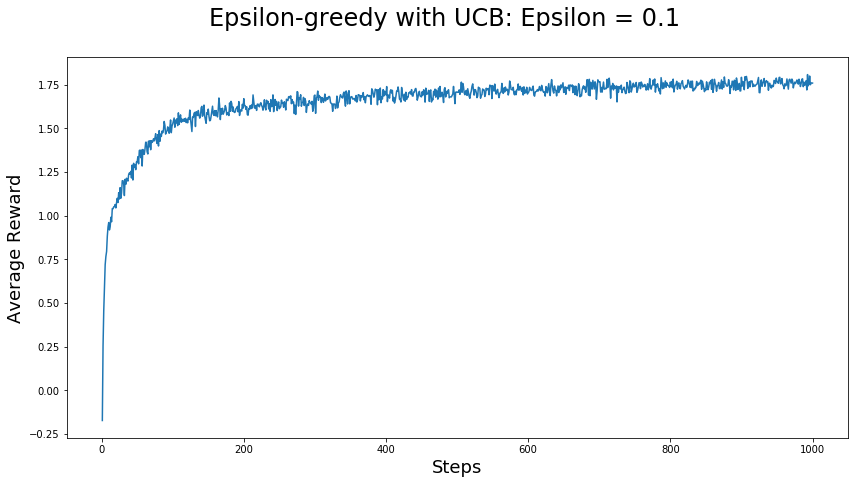

In [83]:
#returns_ucb.mean(axis=1).plot(figsize=(12,8), title="Epsilon-greedy with UCB: Epsilon = 0.1")
fig = plt.figure()
plt.plot(returns_ucb.mean(axis=1))
fig.suptitle('Epsilon-greedy with UCB: Epsilon = 0.1', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.savefig('AR_UCB.png')
plt.show(fig)

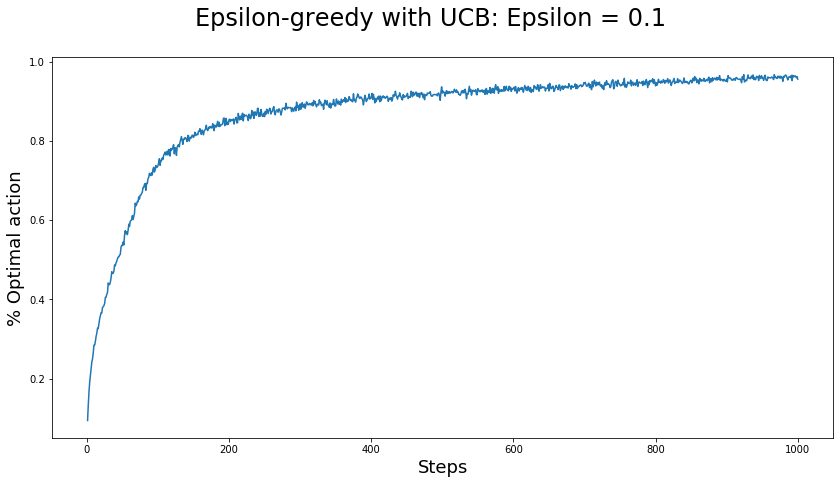

In [84]:
#optimal_action_ucb.mean(axis=1).plot(figsize=(12,8), title="Epsilon-greedy with UCB: Epsilon = 0.1")
fig = plt.figure()
plt.plot(optimal_action_ucb.mean(axis=1))
fig.suptitle('Epsilon-greedy with UCB: Epsilon = 0.1', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)
plt.savefig('OA_UCB.png')
plt.show(fig)

## Gradient Bandit Algorithms

So far we have considered methods that estimate action values and use
those estimates to select actions. This is often a good approach, but it is not the only
one possible. In this section we consider learning a numerical preference for each action
a, which we denote $H_t(a)$. The larger the preference, the more often that action is taken,
but the preference has no interpretation in terms of reward. Only the relative preference
of one action over another is important; if we add 1000 to all the action preferences there
is no effect on the action probabilities, which are determined according to a <i>soft-max</i>
distribution (i.e., Gibbs or Boltzmann distribution) as follows:

$$ Pr\{A_t=a\} = \dfrac{e^{H_t(a)}}{\sum_{b=1}^{k}e^{H_t(b)}} = \pi_t(a) $$

where here we have also introduced a useful new notation, $\pi_t(a)$, for the probability of
taking action a at time $t$. Initially all action preferences are the same (e.g., $H_1(a) = 0$,
for all $a$) so that all actions have an equal probability of being selected.

There is a natural learning algorithm for this setting based on the idea of stochastic
gradient ascent. On each step, after selecting action $A_t$ and receiving the reward $R_t$, the
action preferences are updated by:

$$ 
H_{t+1}(A_t) = H_t(A_t) + \alpha(R_t - \bar{R_t})(1-\pi_t(A_t)), \; and$$
$$
H_{t+1}(a) = H_t(a) - \alpha(R_t - \bar{R_t})\pi_t(a), \;\;\;\;\;\;\;\; \forall a \neq A_t,
$$

where $\alpha > 0$ is a step-size parameter, and $\bar{R_t} \in \mathbb{R}$ is the average of all the rewards up
through and including time $t$. The $\bar{R_t}$ term serves as a
baseline with which the reward is compared. If the reward is higher than the baseline,
then the probability of taking $A_t$ in the future is increased, and if the reward is below
baseline, then probability is decreased. The non-selected actions move in the opposite
direction.

In [24]:
def gba(k, t, action_values, alpha=0.1, qt = 1):
    """
    Implements the gradient bandit algorithm
    """
    ret_total = pd.DataFrame()
    opt_act_tot = pd.DataFrame()
    for i in range(qt):
        qt_chosen = list(np.zeros_like(action_values))
        pref = list(np.zeros_like(action_values))
        prob = list(np.zeros_like(action_values))
        average_rewards = list(np.zeros_like(action_values))
        ret = []
        optimal_action = []
        for n in range(1, t+1):
            prob = list(np.exp(pref)/(np.exp(pref)).sum())
            choice = np.random.choice(list(range(10)), p=prob)
            qt_chosen[choice] +=1
            r_t = float(np.random.normal(loc=action_values[choice],scale=1.0,size=1))
            ret.append(r_t)
            
            # Updating the average return
            update = average_rewards[choice] + (1/qt_chosen[choice]) * (r_t - average_rewards[choice])
            average_rewards[choice] = update
            
            # Updating the preferences
            pref = [
                pref[i] + alpha * (r_t - average_rewards[i]) * (1 - prob[i]) if i == choice else
                pref[i] - alpha * (r_t - average_rewards[i]) * prob[i] for i in range(len(pref))
            ]

            if choice == np.argmax(action_values):
                optimal_action.append(1)
            else:
                optimal_action.append(0)
    
        ret_total = pd.concat([ret_total, pd.DataFrame(ret, columns = [i+1], index=range(1,t+1))], axis=1, sort=False, )
        opt_act_tot = pd.concat([opt_act_tot, pd.DataFrame(optimal_action, columns=[i+1], index=range(1,t+1))], axis=1, sort=False)
    return ret_total, opt_act_tot

In [25]:
#Gradient Bandit Algorithm
returns_gba, optimal_action_gba = gba(np.repeat(0.0,10),1000, action_values, qt=2000, alpha=0.1)

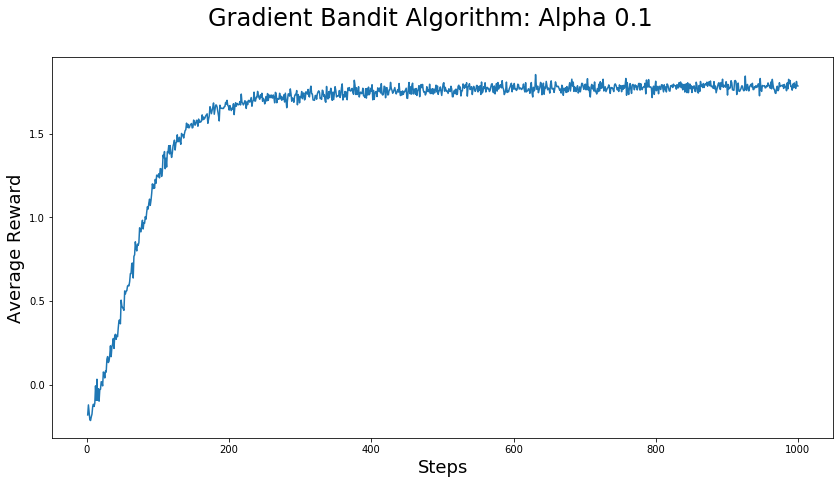

In [85]:
#returns_gba.mean(axis=1).plot(figsize=(12,8), title="Gradient Bandit Algorithm: Alpha 0.1")
fig = plt.figure()
plt.plot(returns_gba.mean(axis=1))
fig.suptitle('Gradient Bandit Algorithm: Alpha 0.1', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.savefig('AR_GBA.png')
plt.show(fig)

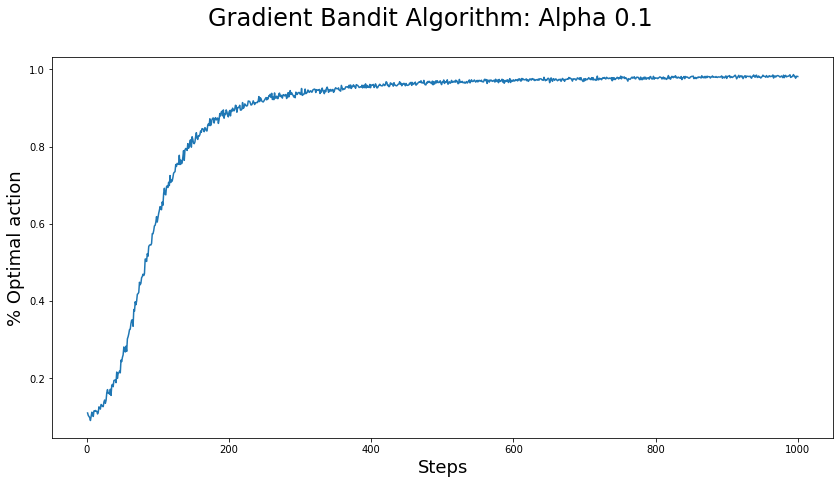

In [86]:
#optimal_action_gba.mean(axis=1).plot(figsize=(12,8), title="Gradient Bandit Algorithm: Alpha 0.1")
fig = plt.figure()
plt.plot(optimal_action_gba.mean(axis=1))
fig.suptitle('Gradient Bandit Algorithm: Alpha 0.1', fontsize=24)
fig.set_size_inches(14,7)
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)
plt.savefig('OA_GBA.png')
plt.show(fig)

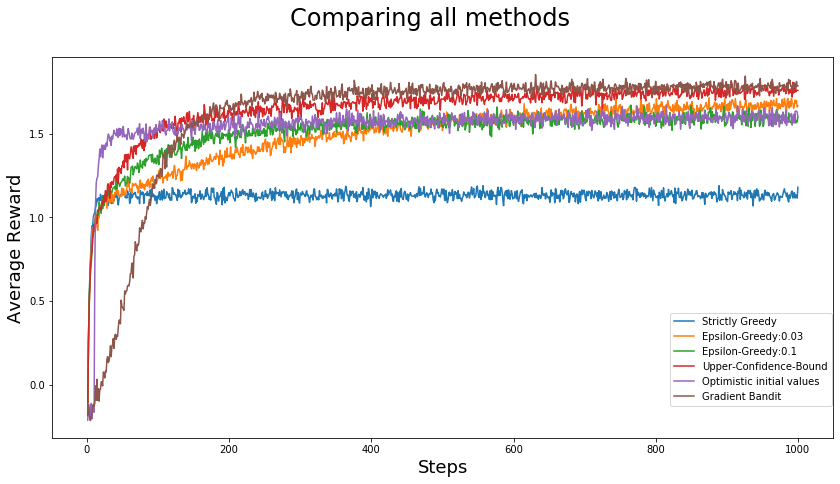

In [87]:
fig = plt.figure()
plt.plot(returns_sg.mean(axis=1), label='Strictly Greedy')
plt.plot(returns_e03.mean(axis=1), label='Epsilon-Greedy:0.03')
plt.plot(returns_e10.mean(axis=1), label='Epsilon-Greedy:0.1')
plt.plot(returns_ucb.mean(axis=1), label='Upper-Confidence-Bound')
plt.plot(returns_oiv.mean(axis=1), label='Optimistic initial values')
plt.plot(returns_gba.mean(axis=1), label='Gradient Bandit')
fig.suptitle('Comparing all methods', fontsize=24)
fig.set_size_inches(14,7)
fig.legend(bbox_to_anchor=(0.83,0.35))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=18)
plt.savefig('AR_CM.png')
plt.show(fig)

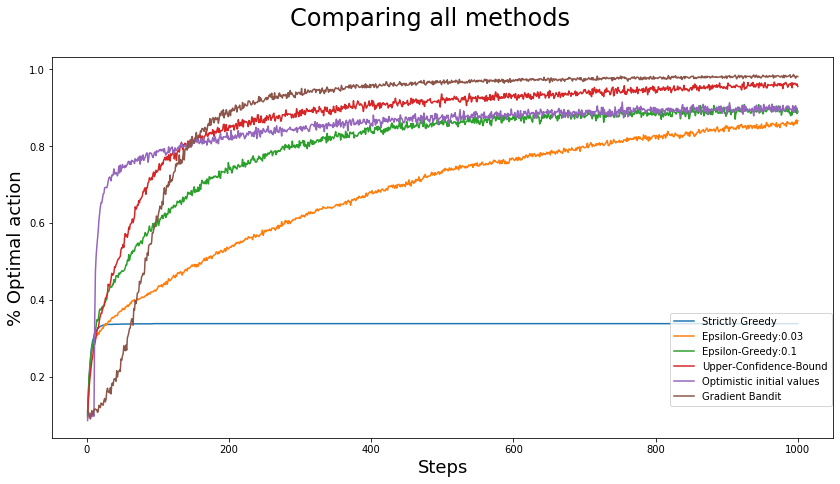

In [88]:
fig = plt.figure()
plt.plot(optimal_action_sg.mean(axis=1), label='Strictly Greedy')
plt.plot(optimal_action_e03.mean(axis=1), label='Epsilon-Greedy:0.03')
plt.plot(optimal_action_e10.mean(axis=1), label='Epsilon-Greedy:0.1')
plt.plot(optimal_action_ucb.mean(axis=1), label='Upper-Confidence-Bound')
plt.plot(optimal_action_oiv.mean(axis=1), label='Optimistic initial values')
plt.plot(optimal_action_gba.mean(axis=1), label='Gradient Bandit')
fig.suptitle('Comparing all methods', fontsize=24)
fig.set_size_inches(14,7)
fig.legend(bbox_to_anchor=(0.83,0.35))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('% Optimal action', fontsize=18)
plt.savefig('OA_CM.png')
plt.show(fig)